# Your Title Here

**Name(s)**: (Jake Wanderer, Calvin Truong)

**Website Link**: (your website link)

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import plotly.express as px
pd.options.plotting.backend = 'plotly'

# from dsc80_utils import * # Feel free to uncomment and use this.

## Step 1: Introduction

Q1: Approximatley how much gold at 10 min is a first dragon "worth"
Q2: What is more important Void grubs or First Dragon. Also hearld or 2nd dragon?
Q3: What side is more likely to win the game, and how is this related to who gets the objectives (drags,baron)
Q4: How well do heavily banned champs actually perform? (Are they best to ban?)

For now we will select question 1 to explore further.

## Step 2: Data Cleaning and Exploratory Data Analysis

In [2]:
df = pd.read_csv("Dataset/2025_LoL_esports_match_data.csv")
df = df = df[df['playerid'].isna()]

/var/folders/jx/n30w97zd1_75l77ctc7sskf40000gn/T/ipykernel_77336/4056111537.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Dataset/2025_LoL_esports_match_data.csv")


In [3]:
gold_dif_vs_win_percentage = df.columns[df.columns.str.contains('golddiffat')].tolist()
#gold_dif_vs_win_percentage.extend(['gameid','result'])
gold_dif_vs_win_percentage.append('result')
gold_differences = df[sorted(gold_dif_vs_win_percentage)]
#gold_differences.head(12)
gold_columns = [col for col in gold_differences.columns if col.startswith('golddiffat')]
gold_columns

['golddiffat10', 'golddiffat15', 'golddiffat20', 'golddiffat25']

In [4]:
# gold_dif_and_win_percentage = df.columns[df.columns.str.contains('golddiffat')].tolist()
# gold_dif_and_win_percentage.append('result')
# gold_differences = df[sorted(gold_dif_vs_win_percentage)]
# gold_columns = [col for col in gold_differences.columns if col.startswith('golddiffat')]

#BELOW IS THE ONE I WAS USING PREVIOUSLY
cleaned = df.copy(deep=False)
gold_info = df.columns[df.columns.str.contains('gold')]
gold_df = df[gold_info]
#cleaned = cleaned.set_index(['gameid','gameid', 'league','side']).loc['11715-11715_game_1'][gold_info]
cleaned = cleaned.set_index(['gameid', 'league','side'])[gold_info]
cleaned = cleaned.reset_index()
cleaned

# cols = [
#     "league", "side",
#     "goldat10", "goldat15", "goldat20", "goldat25",
#     "golddiffat10", "golddiffat15", "golddiffat20", "golddiffat25",
#     "firstdragon",
#     "elementaldrakes", "opp_elementaldrakes",
#     "dragons", "opp_dragons",
#     "result"
# ]
# cleaned = df.copy(deep=False)
# cleaned = cleaned[cols]
# cleaned['']
# cleaned

gameid league  side  totalgold  earnedgold  earnedgoldshare  \
0      LOLTMNT03_179647   LFL2  Blue      42255       24639              NaN   
1      LOLTMNT03_179647   LFL2   Red      53936       36320              NaN   
2       LOLTMNT06_96134   LFL2  Blue      64669       43687              NaN   
3       LOLTMNT06_96134   LFL2   Red      50679       29697              NaN   
4       LOLTMNT06_95160   LFL2  Blue      51389       31835              NaN   
...                 ...    ...   ...        ...         ...              ...   
22324  LOLTMNT02_325137    LAS   Red      49736       29723              NaN   
22325  LOLTMNT02_325138    LAS  Blue      53653       32416              NaN   
22326  LOLTMNT02_325138    LAS   Red      65402       44165              NaN   
22327  LOLTMNT02_326112    LAS  Blue      50487       30729              NaN   
22328  LOLTMNT02_326112    LAS   Red      63605       43847              NaN   

       goldspent  goldat10  opp_goldat10  golddiffat10  goldat15  \
0          38793   14266.0       15988.0       -1722.0   21498.0   
1          43425   15988.0       14266.0        1722.0   25335.0   
2          55950   18459.0       15355.0        3104.0   28328.0   
3          49208   15355.0       18459.0       -3104.0   23259.0   
4          49408   16335.0       17250.0        -915.0   26828.0   
...          ...       ...           ...           ...       ...   
22324      47883   15961.0       17127.0       -1166.0   24234.0   
22325      52146   15088.0       16952.0       -1864.0   22995.0   
22326      57183   16952.0       15088.0        1864.0   26169.0   
22327      48580   16144.0       15718.0         426.0   24815.0   
22328      53363   15718.0       16144.0        -426.0   25589.0   

       opp_goldat15  golddiffat15  goldat20  opp_goldat20  golddiffat20  \
0           25335.0       -3837.0   29475.0       35378.0       -5903.0   
1           21498.0        3837.0   35378.0       29475.0        5903.0   
2           23259.0        5069.0   38360.0       31778.0        6582.0   
3           28328.0       -5069.0   31778.0       38360.0       -6582.0   
4           26710.0         118.0   35320.0       37247.0       -1927.0   
...             ...           ...       ...           ...           ...   
22324       26272.0       -2038.0   32270.0       37580.0       -5310.0   
22325       26169.0       -3174.0   31264.0       37217.0       -5953.0   
22326       22995.0        3174.0   37217.0       31264.0        5953.0   
22327       25589.0        -774.0   33120.0       35820.0       -2700.0   
22328       24815.0         774.0   35820.0       33120.0        2700.0   

       goldat25  opp_goldat25  golddiffat25  
0       39226.0       46192.0       -6966.0  
1       46192.0       39226.0        6966.0  
2       47876.0       39499.0        8377.0  
3       39499.0       47876.0       -8377.0  
4       42735.0       48356.0       -5621.0  
...         ...           ...           ...  
22324   41107.0       46345.0       -5238.0  
22325   41634.0       47235.0       -5601.0  
22326   47235.0       41634.0        5601.0  
22327   43755.0       47469.0       -3714.0  
22328   47469.0       43755.0        3714.0  

[22329 rows x 19 columns]

In [5]:
gold_dif_vs_win_percentage = df.columns[df.columns.str.contains('golddiffat')].tolist()
gold_dif_vs_win_percentage.append('result')
gold_differences = df[sorted(gold_dif_vs_win_percentage)]
gold_columns = [col for col in gold_differences.columns if col.startswith('golddiffat')]
for col in gold_columns:
    fig = px.histogram(
        gold_differences,
        x=col,
        title=f'Gold Difference Distribution at {col[10:]} Minutes',
        labels={col: f'Gold Differences at {col[10:]} mins.'}
    )
    fig.show()


In [6]:
# melted = gold_differences.melt(
#     id_vars=['result'],
#     var_name='Time In-Game', 
#     value_name='Gold Difference'
# )
# melted['Result'] = melted_gold['result'].map({0: 'Loss', 1: 'Win'})

# fig2 = px.box(
#     melted, 
#     x='Time In-Game', 
#     y='Gold Difference', 
#     color='Result',
#     title='Gold Difference Distribution - Wins vs Losses'
# )
# fig2.show()

gold_columns = [col for col in gold_differences.columns if col.startswith('golddiffat')]
for col in gold_columns:
    fig = px.scatter(gold_differences, x=col, y='result')
    mean_loss = gold_differences.loc[gold_differences['result'] == 0, col].mean()
    mean_win = gold_differences.loc[gold_differences['result'] == 1, col].mean()
    
    # Add vertical lines
    fig.add_vline(x=mean_loss, line_dash="dash", line_color="red",
                  annotation_text="Mean Loss", annotation_position="top left")
    fig.add_vline(x=mean_win, line_dash="dash", line_color="green",
                  annotation_text="Mean Win", annotation_position="top right")
    fig.show()

#best to do scatter plot, win or lose is going to be a 1 or 0, gold difference on the x axis, result on the y axis

In [7]:
df['elementaldrakes'].isna().sum()

np.int64(4141)

We are missing some values for the types of dragons. We will exclude these missing values and explain why at the end of part 3.

In [8]:
drag_df = df[['dragons','elders','elementaldrakes']].dropna()

In [9]:
(drag_df['dragons'] - drag_df['elders'] == drag_df['elementaldrakes']).mean()

np.float64(1.0)

This is what we expect it means the rest of our non missing data is good.

In [10]:
elemental = df[['elementaldrakes','opp_elementaldrakes']].dropna()
elemental['counts'] = np.zeros(len(elemental))
counts = elemental.groupby(['elementaldrakes','opp_elementaldrakes']).count().reset_index()
counts['counts'] = counts['counts']/2 #Only count each game once

In [11]:
counts['pair'] = counts.apply(
    lambda row: tuple(sorted([row['elementaldrakes'], row['opp_elementaldrakes']])), axis=1
) #combine opposites
drag_counts = pd.DataFrame(counts.groupby('pair').sum()['counts']).reset_index()
drag_counts['pair'] = drag_counts['pair'].apply(lambda x: f'({str(int(x[0]))},{str(int(x[1]))})')

In [12]:
fig = px.bar(
    drag_counts,
    x='pair',
    y='counts',
    barmode='stack',
    title= "Distribution of Counts of Elemental Drake Pairings",
        labels={
        'pair': 'Pairs of number of Opponent drakes and Number of Ally drakes',
        'counts': 'Total Count'
    }
)

fig.show()

In [13]:
elemental_win = df[['elementaldrakes','opp_elementaldrakes','result']].dropna()
elemental_win = elemental_win.groupby(['elementaldrakes','opp_elementaldrakes']).mean().reset_index()
elemental_win['pair'] = elemental_win.apply(
    lambda row: tuple([row['elementaldrakes'], row['opp_elementaldrakes']]), axis=1
) #combine opposites
elemental_win['pair'] = elemental_win['pair'].apply(lambda x: f'({str(int(x[0]))},{str(int(x[1]))})')

In [14]:
fig = px.bar(
    elemental_win,
    x='pair',
    y='result',
    barmode='stack',
    title= "Win Percentage for Each Pair of Number of Ally vs. Number of Opponenet Drakes",
        labels={
        'pair': 'Number of Ally Drakes Vs. Number of Opponenet Drakes',
        'result': 'Win Percentage'
    }
)

fig.show()

This graph contains redundent information e.g. win% for (0,1) = 1 - win% for (1,0). However, I think this still makes the data easiar to interpret so we will keep it.

## Step 3: Assessment of Missingness

In [15]:
cleaned['golddiffat10_missing'] = cleaned['golddiffat10'].isna()
league_gold10_prop = (
    cleaned
    .groupby(['league', 'golddiffat10_missing'])
    .size()
    .reset_index(name='count')
    .groupby('golddiffat10_missing', group_keys=False)
    .apply(lambda g: g.assign(proportion=g['count'] / g['count'].sum()))
)
fig = px.bar(
    league_gold10_prop,
    x='proportion',
    y='league',
    color='golddiffat10_missing',
    barmode='group',
    orientation='h',
    labels={'golddiffat10_missing': 'golddiffat10 is missing'}
)
fig.update_layout(
    title='Proportion of Leagues by Missingness of golddiffat10',
    xaxis_title='Proportion',
    yaxis_title='League',
    height=900,
    width=900
)
fig.show()


/var/folders/jx/n30w97zd1_75l77ctc7sskf40000gn/T/ipykernel_77336/2782293913.py:8: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [16]:
def tvd(p, q):
    return 0.5 * np.abs(p - q).sum()

In [17]:
obs = league_gold10_prop.pivot(
    index='league',
    columns='golddiffat10_missing',
    values='proportion'
).fillna(0)
observed_stat = tvd(obs[False], obs[True])
stats = []
for i in range(1000):
    shuffled = cleaned.copy()
    shuffled['golddiffat10_missing'] = np.random.permutation(cleaned['golddiffat10_missing'])
    temp = (
        shuffled
        .groupby(['golddiffat10_missing', 'league'])
        .size()
        .reset_index(name='count')
    )
    temp['proportion'] = (
        temp.groupby('golddiffat10_missing')['count']
        .transform(lambda x: x / x.sum())
    )
    temp_pivot = temp.pivot(
        index='league',
        columns='golddiffat10_missing',
        values='proportion'
    ).fillna(0)
    stat = tvd(temp_pivot[False], temp_pivot[True])
    stats.append(stat)
p_value = (np.array(stats) >= observed_stat).mean()
print(p_value, np.mean(stats))

0.0 0.061989098887112265


In [18]:
observed_stat

np.float64(0.9918820971249093)

In [19]:
#do we really want this
import matplotlib.pyplot as plt

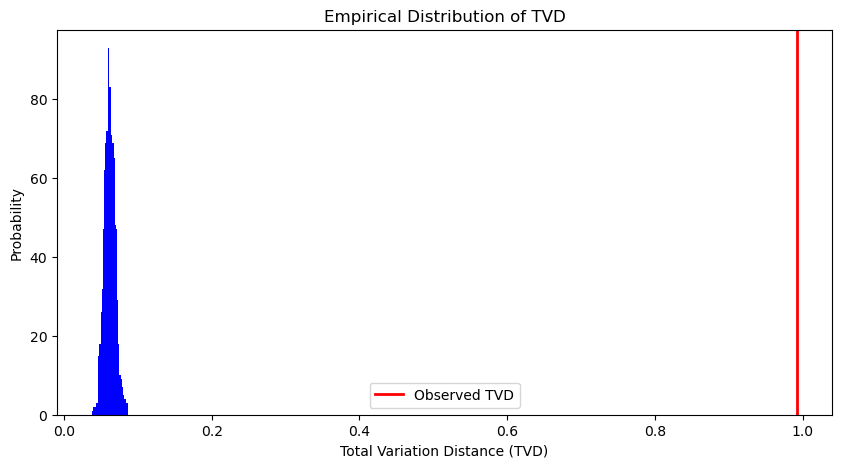

In [20]:
stats_array = np.array(stats)
plt.figure(figsize=(10,5))
plt.hist(stats_array, bins=30, color='blue')
plt.axvline(observed_stat, color='red', linestyle='solid', linewidth=2, label='Observed TVD')
plt.xlabel('Total Variation Distance (TVD)')
plt.ylabel('Probability')
plt.title('Empirical Distribution of TVD')
plt.legend()
plt.show()

In [21]:
cleaned['golddiffat10_missing'] = cleaned['golddiffat10'].isna()
side_gold10_prop = (
    cleaned
    .groupby(['side', 'golddiffat10_missing'])
    .size()
    .reset_index(name='count')
    .groupby('golddiffat10_missing', group_keys=False)
    .apply(lambda g: g.assign(proportion=g['count'] / g['count'].sum()))
)
fig = px.bar(
    side_gold10_prop,
    x='proportion',
    y='side',
    color='golddiffat10_missing',
    barmode='group',
    orientation='h',
    labels={'golddiffat10_missing': 'golddiffat10 is missing'}
)
fig.update_layout(
    title='Proportion of Leagues by Missingness of golddiffat10',
    xaxis_title='Proportion',
    yaxis_title='Side',
    height=900,
    width=900
)
fig.show()


/var/folders/jx/n30w97zd1_75l77ctc7sskf40000gn/T/ipykernel_77336/1729064264.py:8: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [22]:
obs2 = side_gold10_prop.pivot(
    index='side',
    columns='golddiffat10_missing',
    values='proportion'
).fillna(0)
observed_stat2 = tvd(obs2[False], obs2[True])
stats2 = []
for i in range(1000):
    shuffled = cleaned.copy()
    shuffled['golddiffat10_missing'] = np.random.permutation(cleaned['golddiffat10_missing'])
    temp = (
        shuffled
        .groupby(['golddiffat10_missing', 'side'])
        .size()
        .reset_index(name='count')
    )
    temp['proportion'] = (
        temp.groupby('golddiffat10_missing')['count']
        .transform(lambda x: x / x.sum())
    )
    temp_pivot = temp.pivot(
        index='side',
        columns='golddiffat10_missing',
        values='proportion'
    ).fillna(0)
    stat2 = tvd(temp_pivot[False], temp_pivot[True])
    stats2.append(stat2)
p_value2 = (np.array(stats2) >= observed_stat2).mean()
print(p_value2, np.mean(stats2), observed_stat2)

0.911 0.010276946607234584 0.001473785938632538


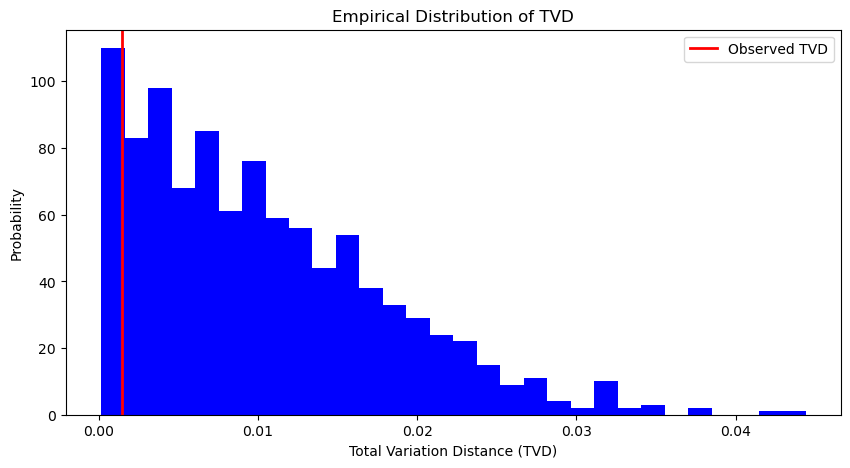

In [23]:
stats_array2 = np.array(stats2)
plt.figure(figsize=(10,5))
plt.hist(stats_array2, bins=30, color='blue')
plt.axvline(observed_stat2, color='red', linestyle='solid', linewidth=2, label='Observed TVD')
plt.xlabel('Total Variation Distance (TVD)')
plt.ylabel('Probability')
plt.title('Empirical Distribution of TVD')
plt.legend()
plt.show()

In [24]:
df[['league','goldat10']].groupby('league').apply(lambda x: x.notnull().mean())

/var/folders/jx/n30w97zd1_75l77ctc7sskf40000gn/T/ipykernel_77336/780040428.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



league  goldat10
league                       
AL              1.0     1.000
ASI             1.0     1.000
Asia Master     1.0     1.000
CD              1.0     1.000
CT              1.0     1.000
EBL             1.0     1.000
EM              1.0     1.000
EWC             1.0     1.000
FST             1.0     1.000
HC              1.0     1.000
HLL             1.0     1.000
HM              1.0     1.000
HW              1.0     1.000
IC              1.0     1.000
LAS             1.0     1.000
LCK             1.0     1.000
LCKC            1.0     1.000
LCP             1.0     1.000
LEC             1.0     1.000
LFL             1.0     1.000
LFL2            1.0     1.000
LIT             1.0     1.000
LJL             1.0     1.000
LPL             1.0     0.000
LPLOL           1.0     1.000
LRN             1.0     1.000
LRS             1.0     1.000
LTA             1.0     1.000
LTA N           1.0     1.000
LTA S           1.0     1.000
LVP SL          1.0     1.000
MSI             1.0     1.000
NACL            1.0     1.000
NEXO            1.0     1.000
NLC             1.0     1.000
PCS             1.0     1.000
PRM             1.0     1.000
PRMP            1.0     1.000
RL              1.0     1.000
ROL             1.0     1.000
TCL             1.0     1.000
VCS             1.0     1.000
WLDs            1.0     0.875

Because every value in the LPL league is missing, we can not impute values here. We can impute values for WLDs, however WLDs only has 192 rows, of which only 12.5% are missing. This means we would only get 24 rows of missing values or 12 games. Aditionally, the other column we care about elementaldrakes is missing for every missing value of goldat10. We have decided not to use missing values from this column because we still have about 19k rows and the information we do have on it is based on 'dragons (type unkown)'. Elderdragon is so different from the other dragons (it is almost always gamewinning), so it seems risky to use this column. We could try imputing values for elementaldrakes, but this could create rare pairings of elementaldrakes and opp_elementaldrakes much more frequently, and even impossible pairings such as (4,4).

In [25]:
(df['league'] == 'WLDs').sum()

np.int64(192)

In [26]:
(df['league'] == 'WLDs').sum() * (1-.875)

np.float64(24.0)

In [27]:
(~(df['elementaldrakes'].isna()) & (df['goldat10'].isna())).sum()

np.int64(0)

## Step 4: Hypothesis Testing

Permutation Test

H0 = Team gold at 10 min for teams who won firstdragon is equal to Team gold at 10 min for teams who lost firstdragon.

H1 = Team gold at 10 min for teams who won firstdragon is not equal to Team gold at 10 min for teams who lost firstdragon.

We will use an alpha = .05 signifiance level.

In [28]:
won_first_drag = df[df['firstdragon'] == 1]['golddiffat10']
lost_first_drag = df[df['firstdragon'] == 0]['golddiffat10']

In [29]:
won_first_drag.isna().sum(), lost_first_drag.isna().sum()

(np.int64(816), np.int64(818))

For the non_missing values for the 'firstdragon' column there are some missing golddiffat10 values. For this hypothesis test because we are comparing mean values, we will use mean imputation on 'firstdragon'

In [30]:
won_first_drag[won_first_drag.isna()] = won_first_drag.mean()
lost_first_drag[lost_first_drag.isna()] = lost_first_drag.mean()

/var/folders/jx/n30w97zd1_75l77ctc7sskf40000gn/T/ipykernel_77336/2112887524.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jx/n30w97zd1_75l77ctc7sskf40000gn/T/ipykernel_77336/2112887524.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
won_mean = won_first_drag.mean()
lost_mean = lost_first_drag.mean()
observed_diff = won_mean - lost_mean

In [32]:
imputed = pd.concat([pd.DataFrame({
    'golddiffat10': won_first_drag,
    'firstdragon': 1
}),(
    pd.DataFrame({
        'golddiffat10': lost_first_drag,
        'firstdragon': 0
    })
)])

In [33]:
diffs = []
for i in range(10000):
    imputed['firstdragon_shuffled'] = np.random.permutation(imputed['firstdragon'])
    won_mean = imputed[imputed['firstdragon_shuffled'] == 1]['golddiffat10'].mean()
    lost_mean = imputed[imputed['firstdragon_shuffled'] == 0]['golddiffat10'].mean()
    diff = won_mean - lost_mean
    diffs.append(diff)
p_value = (diffs >= observed_diff).mean()

In [34]:
p_value

np.float64(0.0)

We reject the null hypothesis at an alpha = .05 significance level.

## Step 5: Framing a Prediction Problem

We will predict who will in the game based on both team gold and dragons at some minute (X) in the game.

## Step 6: Baseline Model

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [36]:
firstdrag_gold10 = df[['firstdragon','goldat10','result']].dropna()

In [37]:
X = firstdrag_gold10[['firstdragon','goldat10']]
y = firstdrag_gold10['result']

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
pl = Pipeline([
    ('rf', RandomForestClassifier(random_state=42))
])

In [40]:
param_grid = {'rf__max_depth': [3,5,7,9,11,20],
              'rf__n_estimators': [50,100,200],
              }

In [41]:
grid_search = GridSearchCV(estimator=pl,param_grid=param_grid,cv=5,n_jobs=-1)

In [43]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [3, 5, 7, 9, 11, 20],
                         'rf__n_estimators': [50, 100, 200]})

In [44]:
grid_search.best_params_

{'rf__max_depth': 3, 'rf__n_estimators': 100}

Train Accuracy

In [49]:
(grid_search.predict(X_train) == y_train).sum()/len(y_train)

np.float64(0.6452233676975945)

Test Accuracy

In [50]:
(grid_search.predict(X_test) == y_test).sum()/len(y_test)

np.float64(0.6352391423859264)

To help better answer our question from part 1, we will permute one column at a time, to test the importance of each feature.

In [60]:
X_test['goldat10shuffled'] = np.random.permutation(X_test['goldat10'])

In [61]:
X_test['firstdragonshuffled'] = np.random.permutation(X_test['firstdragon'])

In [62]:
X_test_gold = X_test[['firstdragon','goldat10shuffled']]
X_test_gold.columns = X_test_gold.columns.str.replace('shuffled','')

In [63]:
X_test_drag = X_test[['firstdragonshuffled','goldat10']]
X_test_drag.columns = X_test_drag.columns.str.replace('shuffled','')

In [64]:
(grid_search.predict(X_test_gold[['firstdragon','goldat10']]) == y_test).sum()/len(y_test)

np.float64(0.5310610225398571)

In [65]:
(grid_search.predict(X_test_drag[['firstdragon','goldat10']]) == y_test).sum()/len(y_test)

np.float64(0.6176470588235294)

Given how low the permuted gold column predictions are, it seems like the firstdragon column may be getting overshadowed in our model due to the features correlating. So, we will train a randomforest on each feature individually to see their importance.

In [66]:
forest = RandomForestClassifier(max_depth=3,n_estimators=50,random_state=42)
forest.fit(X_train[['firstdragon']],y_train)
(forest.predict(X_test[['firstdragon']]) == y_test).sum()/len(y_test)

np.float64(0.5687190764156129)

In [67]:
forest = RandomForestClassifier(max_depth=3,n_estimators=50,random_state=42)
forest.fit(X_train[['goldat10']],y_train)
(forest.predict(X_test[['goldat10']]) == y_test).sum()/len(y_test)

np.float64(0.6261682242990654)

The model only using goldat10 does almost as well as our model with both features, so we can conclude this seems significantly more important than the first dragon.

## Step 7: Final Model

In [68]:
temp = df[['opp_goldat10','opp_goldat15','opp_goldat20','opp_goldat25','goldat10','goldat15','goldat20','goldat25','elementaldrakes','opp_elementaldrakes','result']]

Here we drop rows where we do not know the elementaldrakes. I think this is better than imputing in this instance because we still have a lot of data to work with and the 4th elemental drake and elderdragon are so fundmentally different in the game. We also replace values that are null in goldat20 and goldat25 but not goldat10 with inf and then revert them back later. This is because these values are almost certaintly because the game ended. In this case, we want to keep them NaN, and then not consider them when making the average feature.

In [69]:
temp = temp[temp['elementaldrakes'].isna() == False]
temp['goldat20'][(~temp['goldat10'].isna()) &(temp['goldat20'].isna())] = float('inf')
temp['goldat25'][(~temp['goldat10'].isna()) &(temp['goldat25'].isna())] = float('inf')
temp['opp_goldat20'][(~temp['goldat10'].isna()) &(temp['opp_goldat20'].isna())] = float('inf')
temp['opp_goldat25'][(~temp['goldat10'].isna()) &(temp['opp_goldat25'].isna())] = float('inf')

/var/folders/jx/n30w97zd1_75l77ctc7sskf40000gn/T/ipykernel_77336/4193845262.py:2: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/jx/n30w97zd1_75l77ctc7sskf40000gn/T/ipykernel_77336/4193845262.py:3: FutureWarning:

ChainedAssignme

In [70]:
len(temp)

18188

In [71]:
len(temp.dropna())

18188

From this we see that dropping the null values in elementaldrake columns actually also dropped all null values in goldat10. Therefore, we can now put the null values back for goldat20 and goldat25. Also note goldat15 has no additional null values because games can not end this quick realistically.

In [72]:
non_null = temp.replace(float('inf'),np.nan)

In [73]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.pipeline import make_pipeline

In [74]:
def gold_diff(X):
    X = X.copy()
    diff10 = X['goldat10'] - X['opp_goldat10']
    diff15 = X['goldat15'] - X['opp_goldat15']
    diff20 = X['goldat20'] - X['opp_goldat20']
    diff25 = X['goldat25'] - X['opp_goldat25']
    return pd.DataFrame({'golddiff10': diff10, 'golddiff15': diff15, 'golddiff20': diff20, 'golddiff25': diff25})

In [75]:
def mean_columns(X):
    return np.nanmean(X, axis=1, keepdims=True)

In [76]:
std_sum_diff_pipeline = Pipeline([
    ('diff', FunctionTransformer(gold_diff)),
    ('scaler', StandardScaler()),
    ('sum', FunctionTransformer(mean_columns))
])

In [77]:
def create_drag_combinbation_col(X):
    df = pd.DataFrame(X)
    df['dragons_combination'] = df.apply(lambda row: str(f'{row['elementaldrakes']}, {row['opp_elementaldrakes']}'), axis=1)
    return df[['dragons_combination']]

In [78]:
create_drag_combinbation_col(non_null[['elementaldrakes','opp_elementaldrakes']])

dragons_combination
10                0.0, 2.0
11                2.0, 0.0
22                3.0, 2.0
23                2.0, 3.0
34                0.0, 4.0
...                    ...
118907            0.0, 4.0
118918            1.0, 4.0
118919            4.0, 1.0
118930            0.0, 3.0
118931            3.0, 0.0

[18188 rows x 1 columns]

In [79]:
drag_combo_pipeline = Pipeline([
    ('createcombocol', FunctionTransformer(create_drag_combinbation_col)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [80]:
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', drag_combo_pipeline, ['elementaldrakes', 'opp_elementaldrakes']),
        ('std_sum', std_sum_diff_pipeline, ['goldat10','goldat15','goldat20','goldat25','opp_goldat10','opp_goldat15','opp_goldat20','opp_goldat25']),
    ],
    remainder='passthrough' 
)

In [82]:
X = non_null[['opp_goldat10','opp_goldat15','opp_goldat20','opp_goldat25','goldat10','goldat15','goldat20','goldat25','elementaldrakes','opp_elementaldrakes']]
y = non_null['result']

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
pl = Pipeline([
    ('preprocess', preprocessor),
    ('rf', RandomForestClassifier(random_state=42))
])

For this part we have decided to tune max_depth, min_samples_leaf, and max_features. The reason we are tuning max_features is because we have many OHE columns, and only one quantative column. If our max_features is too low we may only look at OHE columns that are 0 in a tree. We are tuning min_samples_leaf to ensure that rare OHE categories do not cause overfitting, and a tree does not create leaf just for that category. Finally, we are tuning max_depth to ensure the trees do not try to memorize every OHE combination. It is also important for us not to set max_depth too low because we have so many columns now.

We are not tuning the estimator count, and will use the same estimator count as before. We did some additional testing on this model, and 100 also seemed the best. We would still tune this, but it would create a rather long runtime, so we will only test on 100 here.

In [133]:
param_grid = {
    'rf__n_estimators': [100],
    'rf__max_depth': [5, 10, 20, 30, 50],
    'rf__min_samples_leaf': [1, 5, 10],
    'rf__max_features': ['sqrt', 'log2',0.5,None]
}

grid_search = GridSearchCV(
    estimator=pl,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1 
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('createcombocol',
                                                                                          FunctionTransformer(func=<function create_drag_combinbation_col at 0x316d7a160>)),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['elementaldrakes',
                                                                          'opp_elementaldrakes']),
                                                                        ('std_sum',
                                                                         Pipeline(s...
                                                                                          FunctionTransformer(func=<function mean_columns at 0x316d7a520>))]),
                                                                         ['goldat10',
                                                                          'goldat15',
                                                                          'goldat20',
                                                                          'goldat25',
                                                                          'opp_goldat10',
                                                                          'opp_goldat15',
                                                                          'opp_goldat20',
                                                                          'opp_goldat25'])])),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [5, 10, 20, 30, 50],
                         'rf__max_features': ['sqrt', 'log2', 0.5, None],
                         'rf__min_samples_leaf': [1, 5, 10],
                         'rf__n_estimators': [100]},
             scoring='accuracy')

In [134]:
grid_search.best_params_

{'rf__max_depth': 10,
 'rf__max_features': None,
 'rf__min_samples_leaf': 10,
 'rf__n_estimators': 100}

In [135]:
pl = make_pipeline(
    preprocessor,
    RandomForestClassifier(max_depth=10,n_estimators=100,min_samples_leaf = 10, max_features=None, random_state=42)
)

In [88]:
pl.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('createcombocol',
                                                                   FunctionTransformer(func=<function create_drag_combinbation_col at 0x316d7a160>)),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['elementaldrakes',
                                                   'opp_elementaldrakes']),
                                                 ('std_sum',
                                                  Pipeline(steps=[('diff',
                                                                   Functio...diff at 0x316d794e0>)),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('sum',
                                                                   FunctionTransformer(func=<function mean_columns at 0x316d7a520>))]),
                                                  ['goldat10', 'goldat15',
                                                   'goldat20', 'goldat25',
                                                   'opp_goldat10',
                                                   'opp_goldat15',
                                                   'opp_goldat20',
                                                   'opp_goldat25'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, max_features=None,
                                        min_samples_leaf=10,
                                        random_state=42))])

In [89]:
(pl.predict(X_train) == y_train).sum()/len(y_train)

np.float64(0.8679725085910653)

In [90]:
(pl.predict(X_test) == y_test).sum()/len(y_test)

np.float64(0.8562396921385377)

Note: this model will not work as well around 25 min for games where all elemental drakes have not already been taken, as we are using the final drake data, because we can not get the values at a specific time.

Permutation testing importance of each feature

In [91]:
X_test['elementaldrakes'] = np.random.permutation(X_test['elementaldrakes'])
X_test['opp_elementaldrakes'] = np.random.permutation(X_test['opp_elementaldrakes'])

In [92]:
(pl.predict(X_test) == y_test).sum()/len(y_test)

np.float64(0.7028587135788895)

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
X_test['goldat10'] = np.random.permutation(X_test['goldat10'])
X_test['goldat15'] = np.random.permutation(X_test['goldat15'])
X_test['goldat20'] = np.random.permutation(X_test['goldat20'])
X_test['goldat25'] = np.random.permutation(X_test['goldat25'])

In [95]:
(pl.predict(X_test) == y_test).sum()/len(y_test)

np.float64(0.8023639362286971)

From our test here, it seems like the dragons and opposing dragons actually matters more than the golddiff through the game. So although the first dragon is not as important as goldat10, the final dragon count is. This is likely because goldat10 directly helps teams get more dragons in the future, whereas the first dragon is not too important for that.

## Step 8: Fairness Analysis

It is generally considered easiar for red side to get dragons, and blue side to get other objectives, such as baron and rift herald. Because we only used dragons in our model, we will investigate if this makes our model unfair for the blue or red side.

We will run a one sides hypothesis test to test if red has a greater recall than blue. This is what we would expect because it is easiar for red to get dragons (which our model uses), and it is easiar for blue to get other objectives like baron (which our model does not use).
H0 = The recall for blue side is greater than or equal to the recall for red side.
H1 = The recall for red side is greater than the recall for blue side.

We will use an alpha = .05 significance level.

In [119]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
side = df[['side']]

In [121]:
X_test = X_test.merge(side, left_index=True, right_index=True,how='left')

In [122]:
blue_side = X_test[X_test['side'] == 'Blue']
red_side = X_test[X_test['side'] == 'Red']
y_test_blue = y_test[blue_side.index]
y_test_red = y_test[red_side.index]
blue_pred = pl.predict(blue_side.drop(columns=['side']))
red_pred = pl.predict(red_side.drop(columns=['side']))

In [123]:
from sklearn import metrics
red_recall = metrics.recall_score(y_test_red,red_pred)
blue_recall = metrics.recall_score(y_test_blue,blue_pred)

In [124]:
observed_diff = blue_recall - red_recall

In [125]:
observed_diff

np.float64(-0.047189334534652905)

In [126]:
X_test['pred'] = pl.predict(X_test.drop(columns=['side']))

In [127]:
diffs = []
for i in range (10000):
    X_test['side_shuffled'] = np.random.permutation(X_test['side'])
    blue_side = X_test[X_test['side_shuffled'] == 'Blue']
    red_side = X_test[X_test['side_shuffled'] == 'Red']
    y_test_blue = y_test[blue_side.index]
    y_test_red = y_test[red_side.index]
    blue_pred = X_test.loc[blue_side.index]['pred']
    red_pred = X_test.loc[red_side.index]['pred']
    blue_recall = metrics.recall_score(y_test_blue,blue_pred)
    red_recall = metrics.recall_score(y_test_red,red_pred)
    diff = blue_recall - red_recall
    diffs.append(diff)

In [128]:
p_value = (diffs <= observed_diff).sum()/1000
p_value

np.float64(0.027)

We Reject the Null hypothesis at an alpha = .05 significance level.